# ABE 516 Project - initial data wrangling

### Load in raw data for flow calculations

In [1]:
#imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import numpy as np
import datetime as dt

# allow plots to appear directly in the notebook
%matplotlib inline

In [2]:

base_url = "http://mesonet.agron.iastate.edu/pickup/.jaynes/"
year = "2022"
site = "Shearer_Level"
file_type = ".dat"
combo = "/"

full_url = base_url+year+combo+site+file_type
print(full_url)

http://mesonet.agron.iastate.edu/pickup/.jaynes/2022/Shearer_Level.dat


In [3]:
data = pd.read_csv(full_url, header = 1)
data.head(10)

,TIMESTAMP,RECORD,BattV_Avg,PTemp_Avg,AirTC_Avg,Rain_mm_Tot,D_1_Avg,D_2_Avg,VWC_Shearer1,EC_Shearer1,...,T_Shearer4,P_Shearer4,PA_Shearer4,VR_Shearer4,VWC_Shearer5,EC_Shearer5,T_Shearer5,P_Shearer5,PA_Shearer5,VR_Shearer5
0,TS,RN,Volts,C,C,mm,mV,mV,m^3/m^3,dS/m,...,Deg C,unitless,nSec,unitless,m^3/m^3,dS/m,Deg C,unitless,nSec,unitless
1,NaN,NaN,Avg,Avg,Avg,Tot,Avg,Avg,Smp,Smp,...,Smp,Smp,Smp,Smp,Smp,Smp,Smp,Smp,Smp,Smp
2,2022-01-01 00:00:00,48754,12.01,-11.58,NAN,0,0.009,0.006,0.18,0.04,...,4.485,21.76,1.784,1.279,0.391,0.386,5.869,24.07,1.847,1.482
3,2022-01-01 01:00:00,48755,11.99,-12.72,NAN,0,0.007,0,0.169,0.036,...,4.451,21.76,1.784,1.28,0.391,0.381,5.86,24.09,1.847,1.476
4,2022-01-01 02:00:00,48756,11.97,-13.59,NAN,0,0.005,0.001,0.157,0.03,...,4.469,21.76,1.784,1.28,0.391,0.383,5.848,24.08,1.847,1.478
5,2022-01-01 03:00:00,48757,11.95,-14.61,NAN,0,0.007,0,0.142,0.024,...,4.451,21.76,1.784,1.279,0.391,0.382,5.857,24.09,1.847,1.477
6,2022-01-01 04:00:00,48758,11.93,-15.46,NAN,0,0.004,-0.001,0.132,0.021,...,4.429,21.76,1.784,1.279,0.391,0.383,5.866,24.08,1.847,1.478
7,2022-01-01 05:00:00,48759,11.92,-15.63,NAN,0,0.002,0,0.124,0.019,...,4.479,21.76,1.784,1.279,0.391,0.385,5.824,24.08,1.847,1.481
8,2022-01-01 06:00:00,48760,11.9,-15.81,NAN,0,0.005,0.002,0.118,0.017,...,4.436,21.76,1.784,1.279,0.391,0.386,5.875,24.07,1.847,1.482
9,2022-01-01 07:00:00,48761,11.88,-16.21,NAN,0,0.004,0,0.113,0.015,...,4.457,21.76,1.784,1.279,0.391,0.386,5.848,24.07,1.847,1.482


### Subset and Change Data Types

In [4]:
#data.iloc[-0:2]
#data2 = data.drop([0,1], axis = 0)
data2 = data[2:]

In [5]:
data2.head(10)

,TIMESTAMP,RECORD,BattV_Avg,PTemp_Avg,AirTC_Avg,Rain_mm_Tot,D_1_Avg,D_2_Avg,VWC_Shearer1,EC_Shearer1,...,T_Shearer4,P_Shearer4,PA_Shearer4,VR_Shearer4,VWC_Shearer5,EC_Shearer5,T_Shearer5,P_Shearer5,PA_Shearer5,VR_Shearer5
2,2022-01-01 00:00:00,48754,12.01,-11.58,NAN,0,0.009,0.006,0.18,0.04,...,4.485,21.76,1.784,1.279,0.391,0.386,5.869,24.07,1.847,1.482
3,2022-01-01 01:00:00,48755,11.99,-12.72,NAN,0,0.007,0,0.169,0.036,...,4.451,21.76,1.784,1.28,0.391,0.381,5.86,24.09,1.847,1.476
4,2022-01-01 02:00:00,48756,11.97,-13.59,NAN,0,0.005,0.001,0.157,0.03,...,4.469,21.76,1.784,1.28,0.391,0.383,5.848,24.08,1.847,1.478
5,2022-01-01 03:00:00,48757,11.95,-14.61,NAN,0,0.007,0,0.142,0.024,...,4.451,21.76,1.784,1.279,0.391,0.382,5.857,24.09,1.847,1.477
6,2022-01-01 04:00:00,48758,11.93,-15.46,NAN,0,0.004,-0.001,0.132,0.021,...,4.429,21.76,1.784,1.279,0.391,0.383,5.866,24.08,1.847,1.478
7,2022-01-01 05:00:00,48759,11.92,-15.63,NAN,0,0.002,0,0.124,0.019,...,4.479,21.76,1.784,1.279,0.391,0.385,5.824,24.08,1.847,1.481
8,2022-01-01 06:00:00,48760,11.9,-15.81,NAN,0,0.005,0.002,0.118,0.017,...,4.436,21.76,1.784,1.279,0.391,0.386,5.875,24.07,1.847,1.482
9,2022-01-01 07:00:00,48761,11.88,-16.21,NAN,0,0.004,0,0.113,0.015,...,4.457,21.76,1.784,1.279,0.391,0.386,5.848,24.07,1.847,1.482
10,2022-01-01 08:00:00,48762,11.86,-16.55,NAN,0,0.005,0.002,0.109,0.014,...,4.436,21.76,1.784,1.28,0.391,0.382,5.845,24.09,1.847,1.477
11,2022-01-01 09:00:00,48763,11.88,-16.56,NAN,0,0.005,0,0.106,0.014,...,4.429,21.76,1.784,1.28,0.391,0.381,5.833,24.09,1.847,1.476


In [6]:
data2.reset_index(drop = True, inplace = True)
data2.head(-10)

,TIMESTAMP,RECORD,BattV_Avg,PTemp_Avg,AirTC_Avg,Rain_mm_Tot,D_1_Avg,D_2_Avg,VWC_Shearer1,EC_Shearer1,...,T_Shearer4,P_Shearer4,PA_Shearer4,VR_Shearer4,VWC_Shearer5,EC_Shearer5,T_Shearer5,P_Shearer5,PA_Shearer5,VR_Shearer5
0,2022-01-01 00:00:00,48754,12.01,-11.58,NAN,0,0.009,0.006,0.18,0.04,...,4.485,21.76,1.784,1.279,0.391,0.386,5.869,24.07,1.847,1.482
1,2022-01-01 01:00:00,48755,11.99,-12.72,NAN,0,0.007,0,0.169,0.036,...,4.451,21.76,1.784,1.28,0.391,0.381,5.86,24.09,1.847,1.476
2,2022-01-01 02:00:00,48756,11.97,-13.59,NAN,0,0.005,0.001,0.157,0.03,...,4.469,21.76,1.784,1.28,0.391,0.383,5.848,24.08,1.847,1.478
3,2022-01-01 03:00:00,48757,11.95,-14.61,NAN,0,0.007,0,0.142,0.024,...,4.451,21.76,1.784,1.279,0.391,0.382,5.857,24.09,1.847,1.477
4,2022-01-01 04:00:00,48758,11.93,-15.46,NAN,0,0.004,-0.001,0.132,0.021,...,4.429,21.76,1.784,1.279,0.391,0.383,5.866,24.08,1.847,1.478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8446,2022-12-21 17:00:00,57200,12.44,-9.83,NAN,0,-0.004,-0.01,0.173,0.036,...,4.177,21.2,1.772,1.297,0.368,0.362,5.559,21.93,1.803,1.452
8447,2022-12-21 18:00:00,57201,12.38,-9.5,NAN,0,-0.006,-0.015,0.17,0.036,...,4.168,21.2,1.772,1.297,0.368,0.364,5.553,21.93,1.803,1.454
8448,2022-12-21 19:00:00,57202,12.3,-9.26,NAN,0,-0.007,-0.013,0.167,0.035,...,4.171,21.25,1.773,1.296,0.368,0.363,5.495,21.93,1.803,1.453
8449,2022-12-21 20:00:00,57203,12.24,-9.21,NAN,0,-0.004,-0.01,0.166,0.034,...,4.171,21.31,1.775,1.297,0.368,0.362,5.498,21.88,1.802,1.452


In [7]:
data2.dtypes

TIMESTAMP       object
RECORD          object
BattV_Avg       object
PTemp_Avg       object
AirTC_Avg       object
Rain_mm_Tot     object
D_1_Avg         object
D_2_Avg         object
VWC_Shearer1    object
EC_Shearer1     object
T_Shearer1      object
P_Shearer1      object
PA_Shearer1     object
VR_Shearer1     object
VWC_Shearer2    object
EC_Shearer2     object
T_Shearer2      object
P_Shearer2      object
PA_Shearer2     object
VR_Shearer2     object
VWC_Shearer3    object
EC_Shearer3     object
T_Shearer3      object
P_Shearer3      object
PA_Shearer3     object
VR_Shearer3     object
VWC_Shearer4    object
EC_Shearer4     object
T_Shearer4      object
P_Shearer4      object
PA_Shearer4     object
VR_Shearer4     object
VWC_Shearer5    object
EC_Shearer5     object
T_Shearer5      object
P_Shearer5      object
PA_Shearer5     object
VR_Shearer5     object
dtype: object

In [8]:
data3 = data2.iloc[:,0:8]

In [9]:
data3["BattV_Avg"]=data3["BattV_Avg"].astype("float64")
data3["PTemp_Avg"]=data3["PTemp_Avg"].astype("float64")
data3["AirTC_Avg"]=data3["AirTC_Avg"].astype("float64")
data3["Rain_mm_Tot"]=data3["Rain_mm_Tot"].astype("float64")
data3["D_1_Avg"]=data3["D_1_Avg"].astype("float64")
data3["D_2_Avg"]=data3["D_2_Avg"].astype("float64")
data3["TIMESTAMP"]=pd.to_datetime(data3["TIMESTAMP"])

C:\Users\gjohnson\AppData\Local\Temp\ipykernel_14076\3206388027.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3["BattV_Avg"]=data3["BattV_Avg"].astype("float64")
C:\Users\gjohnson\AppData\Local\Temp\ipykernel_14076\3206388027.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3["PTemp_Avg"]=data3["PTemp_Avg"].astype("float64")
C:\Users\gjohnson\AppData\Local\Temp\ipykernel_14076\3206388027.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

In [10]:
data3.dtypes

TIMESTAMP      datetime64[ns]
RECORD                 object
BattV_Avg             float64
PTemp_Avg             float64
AirTC_Avg             float64
Rain_mm_Tot           float64
D_1_Avg               float64
D_2_Avg               float64
dtype: object

### Plot Transducer Readings Over Time

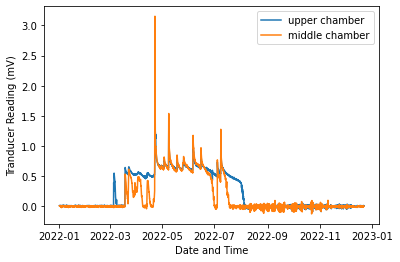

In [11]:
plt.plot(data3["TIMESTAMP"], data3["D_1_Avg"], label = "upper chamber")
plt.plot(data3["TIMESTAMP"], data3["D_2_Avg"], label = "middle chamber")
plt.ylabel("Tranducer Reading (mV)")
plt.xlabel("Date and Time")
plt.legend()
plt.show()


In [12]:
data3.head()

,TIMESTAMP,RECORD,BattV_Avg,PTemp_Avg,AirTC_Avg,Rain_mm_Tot,D_1_Avg,D_2_Avg
0,2022-01-01 00:00:00,48754,12.01,-11.58,NaN,0.0,0.009,0.006
1,2022-01-01 01:00:00,48755,11.99,-12.72,NaN,0.0,0.007,0.000
2,2022-01-01 02:00:00,48756,11.97,-13.59,NaN,0.0,0.005,0.001
3,2022-01-01 03:00:00,48757,11.95,-14.61,NaN,0.0,0.007,0.000
4,2022-01-01 04:00:00,48758,11.93,-15.46,NaN,0.0,0.004,-0.001


### Calculate Water Levels and Flows

In [13]:
# Transducer Calibration
slope1 = 1.0101667
intercept1 = 0.1407917
trans_offset1 = 0.53125
slope2 = 1.0096
intercept2 = 0.14698
trans_offset2 = 0.53125


In [14]:
data3["Upper_WatLev_Weir_ft"] = slope1*data3["D_1_Avg"]+intercept1-trans_offset1
data3["Middle_WatLev_Weir_ft"] = slope2*data3["D_2_Avg"]+intercept2-trans_offset2

C:\Users\gjohnson\AppData\Local\Temp\ipykernel_14076\261010027.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3["Upper_WatLev_Weir_ft"] = slope1*data3["D_1_Avg"]+intercept1-trans_offset1
C:\Users\gjohnson\AppData\Local\Temp\ipykernel_14076\261010027.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3["Middle_WatLev_Weir_ft"] = slope2*data3["D_2_Avg"]+intercept2-trans_offset2


In [15]:
data3.head()

,TIMESTAMP,RECORD,BattV_Avg,PTemp_Avg,AirTC_Avg,Rain_mm_Tot,D_1_Avg,D_2_Avg,Upper_WatLev_Weir_ft,Middle_WatLev_Weir_ft
0,2022-01-01 00:00:00,48754,12.01,-11.58,NaN,0.0,0.009,0.006,-0.381367,-0.378212
1,2022-01-01 01:00:00,48755,11.99,-12.72,NaN,0.0,0.007,0.000,-0.383387,-0.384270
2,2022-01-01 02:00:00,48756,11.97,-13.59,NaN,0.0,0.005,0.001,-0.385407,-0.383260
3,2022-01-01 03:00:00,48757,11.95,-14.61,NaN,0.0,0.007,0.000,-0.383387,-0.384270
4,2022-01-01 04:00:00,48758,11.93,-15.46,NaN,0.0,0.004,-0.001,-0.386418,-0.385280


In [16]:
#Weir Calibration - Flow Equation
coeff1 = 1.4774
exp1 = 2.3217
coeff2 = 0.9478
exp2 = 2.5388


In [17]:
data3["flow_in_gpm"] = np.where(data3["Upper_WatLev_Weir_ft"] < 0, 0, coeff1*(data3["Upper_WatLev_Weir_ft"]*12)**exp1)
data3["flow_in_gpm"] = data3["flow_in_gpm"].where(data3["flow_in_gpm"]<500, other=500)

data3["flow_bypass_gpm"] = np.where(data3["Middle_WatLev_Weir_ft"] < 0, 0, coeff2*(data3["Middle_WatLev_Weir_ft"]*12)**exp2)
data3["flow_bypass_gpm"] = data3["flow_bypass_gpm"].where(data3["flow_bypass_gpm"]<500, other=500)

data3["flow_treated_gpm"] = data3["flow_in_gpm"] - data3["flow_bypass_gpm"]
data3["flow_treated_gpm"] = data3["flow_treated_gpm"].where(data3["flow_treated_gpm"]>0, other=0)

C:\Users\gjohnson\AppData\Local\Temp\ipykernel_14076\3351044047.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3["flow_in_gpm"] = np.where(data3["Upper_WatLev_Weir_ft"] < 0, 0, coeff1*(data3["Upper_WatLev_Weir_ft"]*12)**exp1)
C:\Users\gjohnson\AppData\Local\Temp\ipykernel_14076\3351044047.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3["flow_in_gpm"] = data3["flow_in_gpm"].where(data3["flow_in_gpm"]<500, other=500)
C:\Users\gjohnson\AppData\Local\Temp\ipykernel_14076\3351044047.py:4: Sett

In [18]:
data3.head(-10)

,TIMESTAMP,RECORD,BattV_Avg,PTemp_Avg,AirTC_Avg,Rain_mm_Tot,D_1_Avg,D_2_Avg,Upper_WatLev_Weir_ft,Middle_WatLev_Weir_ft,flow_in_gpm,flow_bypass_gpm,flow_treated_gpm
0,2022-01-01 00:00:00,48754,12.01,-11.58,NaN,0.0,0.009,0.006,-0.381367,-0.378212,0.0,0.0,0.0
1,2022-01-01 01:00:00,48755,11.99,-12.72,NaN,0.0,0.007,0.000,-0.383387,-0.384270,0.0,0.0,0.0
2,2022-01-01 02:00:00,48756,11.97,-13.59,NaN,0.0,0.005,0.001,-0.385407,-0.383260,0.0,0.0,0.0
3,2022-01-01 03:00:00,48757,11.95,-14.61,NaN,0.0,0.007,0.000,-0.383387,-0.384270,0.0,0.0,0.0
4,2022-01-01 04:00:00,48758,11.93,-15.46,NaN,0.0,0.004,-0.001,-0.386418,-0.385280,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8446,2022-12-21 17:00:00,57200,12.44,-9.83,NaN,0.0,-0.004,-0.010,-0.394499,-0.394366,0.0,0.0,0.0
8447,2022-12-21 18:00:00,57201,12.38,-9.50,NaN,0.0,-0.006,-0.015,-0.396519,-0.399414,0.0,0.0,0.0
8448,2022-12-21 19:00:00,57202,12.30,-9.26,NaN,0.0,-0.007,-0.013,-0.397529,-0.397395,0.0,0.0,0.0
8449,2022-12-21 20:00:00,57203,12.24,-9.21,NaN,0.0,-0.004,-0.010,-0.394499,-0.394366,0.0,0.0,0.0


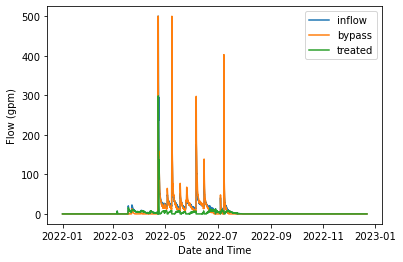

In [19]:
plt.plot(data3["TIMESTAMP"], data3["flow_in_gpm"], label = "inflow")
plt.plot(data3["TIMESTAMP"], data3["flow_bypass_gpm"], label = "bypass")
plt.plot(data3["TIMESTAMP"], data3["flow_treated_gpm"], label = "treated")
plt.ylabel("Flow (gpm)")
plt.xlabel("Date and Time")
plt.legend()
plt.show()


### Get daily average flow and cumulative flow

In [20]:
data_date = pd.DataFrame(pd.to_datetime(data3["TIMESTAMP"]).dt.date.unique().tolist())
data_date = data_date.rename(columns = {data_date.columns[0]:"Date"})
data_date.head()
data_date["Date"] = pd.to_datetime(data_date["Date"])
data_date.dtypes

Date    datetime64[ns]
dtype: object

In [21]:
data3["Date"] = data3["TIMESTAMP"].dt.date
data3.head(-20)

C:\Users\gjohnson\AppData\Local\Temp\ipykernel_14076\2451804059.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3["Date"] = data3["TIMESTAMP"].dt.date


,TIMESTAMP,RECORD,BattV_Avg,PTemp_Avg,AirTC_Avg,Rain_mm_Tot,D_1_Avg,D_2_Avg,Upper_WatLev_Weir_ft,Middle_WatLev_Weir_ft,flow_in_gpm,flow_bypass_gpm,flow_treated_gpm,Date
0,2022-01-01 00:00:00,48754,12.01,-11.58,NaN,0.0,0.009,0.006,-0.381367,-0.378212,0.0,0.0,0.0,2022-01-01
1,2022-01-01 01:00:00,48755,11.99,-12.72,NaN,0.0,0.007,0.000,-0.383387,-0.384270,0.0,0.0,0.0,2022-01-01
2,2022-01-01 02:00:00,48756,11.97,-13.59,NaN,0.0,0.005,0.001,-0.385407,-0.383260,0.0,0.0,0.0,2022-01-01
3,2022-01-01 03:00:00,48757,11.95,-14.61,NaN,0.0,0.007,0.000,-0.383387,-0.384270,0.0,0.0,0.0,2022-01-01
4,2022-01-01 04:00:00,48758,11.93,-15.46,NaN,0.0,0.004,-0.001,-0.386418,-0.385280,0.0,0.0,0.0,2022-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8436,2022-12-21 07:00:00,57190,12.07,-17.25,NaN,0.0,-0.002,-0.008,-0.392479,-0.392347,0.0,0.0,0.0,2022-12-21
8437,2022-12-21 08:00:00,57191,12.07,-16.99,NaN,0.0,-0.001,-0.008,-0.391468,-0.392347,0.0,0.0,0.0,2022-12-21
8438,2022-12-21 09:00:00,57192,12.14,-16.66,NaN,0.0,-0.002,-0.008,-0.392479,-0.392347,0.0,0.0,0.0,2022-12-21
8439,2022-12-21 10:00:00,57193,12.44,-15.80,NaN,0.0,-0.006,-0.011,-0.396519,-0.395376,0.0,0.0,0.0,2022-12-21


In [22]:
daily_avg_df1 = data3.groupby(["Date"])["flow_in_gpm"].mean()
daily_avg_df2 = data3.groupby(["Date"])["flow_bypass_gpm"].mean()
daily_avg_df3 = data3.groupby(["Date"])["flow_treated_gpm"].mean()
daily_avg_df1 = pd.DataFrame(daily_avg_df1)
daily_avg_df1.reset_index(inplace = True)
daily_avg_df2 = pd.DataFrame(daily_avg_df2)
daily_avg_df2.reset_index(inplace = True)
daily_avg_df3 = pd.DataFrame(daily_avg_df3)
daily_avg_df3.reset_index(inplace = True)
#daily_avg_df1.head()
#data4["Date"] = data_date["Date"]
#data4 = data4.rename(columns = {"flow_treated_gpm":"flow_treated_daily_avg_gpm"})
#data4["Date"]=pd.to_datetime(data4["Date"])
#data4[104:116]
#data4.columns
#data4.head()

In [32]:
data4 = pd.merge(daily_avg_df1, daily_avg_df2, how = "inner", on = "Date")
data4 = pd.merge(data4, daily_avg_df3, how = "inner", on = "Date")
data4.head()

,Date,flow_in_gpm,flow_bypass_gpm,flow_treated_gpm
0,2022-01-01,0.0,0.0,0.0
1,2022-01-02,0.0,0.0,0.0
2,2022-01-03,0.0,0.0,0.0
3,2022-01-04,0.0,0.0,0.0
4,2022-01-05,0.0,0.0,0.0


In [33]:
#data4["Date"] = data_date["Date"]
data4 = data4.rename(columns = {"flow_treated_gpm":"flow_treated_daily_avg_gpm"})
#data4["Date"]=pd.to_datetime(data4["Date"])
data4[104:116]
#data4.columns
#data4.head()

,Date,flow_in_gpm,flow_bypass_gpm,flow_treated_daily_avg_gpm
104,2022-04-15,5.005351,0.000000,5.005351
105,2022-04-16,3.722944,0.000000,3.722944
106,2022-04-17,3.262958,0.000000,3.262958
107,2022-04-18,2.745229,0.000000,2.745229
108,2022-04-19,2.448966,0.000000,2.448966
109,2022-04-20,2.765787,0.000000,2.765787
110,2022-04-21,3.618306,0.000000,3.618306
111,2022-04-22,293.055694,227.485140,65.749707
112,2022-04-23,200.115572,133.472091,67.081230
113,2022-04-24,59.865384,64.245882,0.000000


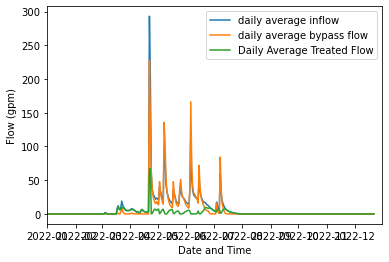

In [34]:
plt.plot(data4["Date"], data4["flow_in_gpm"], label = "daily average inflow")
plt.plot(data4["Date"], data4["flow_bypass_gpm"], label = "daily average bypass flow")
plt.plot(data4["Date"], data4["flow_treated_daily_avg_gpm"], label = "Daily Average Treated Flow")
plt.ylabel("Flow (gpm)")
plt.xlabel("Date and Time")
plt.xlim([dt.date(2022, 1, 1), dt.date(2022, 12, 31)])
plt.legend()
plt.show()


In [35]:
cumu_in = data4["flow_in_gpm"].sum()*60*24*0.003785
cumu_bypass = data4["flow_bypass_gpm"].sum()*60*24*0.003785
cumu_treated = data4["flow_treated_daily_avg_gpm"].sum()*60*24*0.003785
print(cumu_in)

15424.407009805022


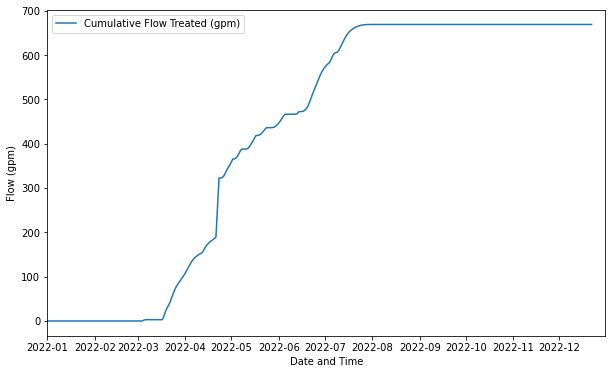

In [44]:
plt.figure(figsize = (10,6))
data4["flow_in_cumu"] = np.cumsum(data4["flow_in_gpm"])
data4["flow_bypass_cumu"] = np.cumsum(data4["flow_bypass_gpm"])
data4["flow_treated_cumu"] = np.cumsum(data4["flow_treated_daily_avg_gpm"])
plt.plot(data4["Date"], data4["flow_treated_cumu"], label = "Cumulative Flow Treated (gpm)")
#plt.plot(data3["TIMESTAMP"], data3["flow_bypass_gpm"], label = "middle chamber")
#plt.plot(data3["TIMESTAMP"], data3["flow_treated_gpm"], label = "Treated")
plt.ylabel("Flow (gpm)")
plt.xlabel("Date and Time")
plt.xlim([dt.date(2022, 1, 1), dt.date(2022, 12, 31)])
plt.legend()

plt.show()

**Count # of days of flow**

In [37]:
days_flow = len(data4[data4["flow_treated_daily_avg_gpm"] > 0])
print(days_flow)

126


In [38]:
data4.head()

,Date,flow_in_gpm,flow_bypass_gpm,flow_treated_daily_avg_gpm,flow_in_cumu,flow_bypass_cumu,flow_treated_cumu
0,2022-01-01,0.0,0.0,0.0,0.0,0.0,0.0
1,2022-01-02,0.0,0.0,0.0,0.0,0.0,0.0
2,2022-01-03,0.0,0.0,0.0,0.0,0.0,0.0
3,2022-01-04,0.0,0.0,0.0,0.0,0.0,0.0
4,2022-01-05,0.0,0.0,0.0,0.0,0.0,0.0


**Export cumulative flow to csv**

In [40]:
data4.to_csv("cumu_flow.csv", index = False)